## Histogram

In [1]:
import numpy as np
import pandas as pd
from toolkit import openFile
ECG_folder_path = '/home/hsiehch/dataset/'
table_path = 'labels.csv'

table = pd.read_csv(table_path, dtype='str', header=None)
count = []

for name in table[0]:
    data = openFile.openData(ECG_folder_path, name)
    count.append(len(data)//300)

In [25]:
tmp = np.array(count)
for i in range(25, 36):
    print("{} sec: {}".format(i, len(np.where(tmp==i)[0])))

25 sec: 36
26 sec: 36
27 sec: 41
28 sec: 31
29 sec: 16
30 sec: 6015
31 sec: 56
32 sec: 87
33 sec: 72
34 sec: 52
35 sec: 32


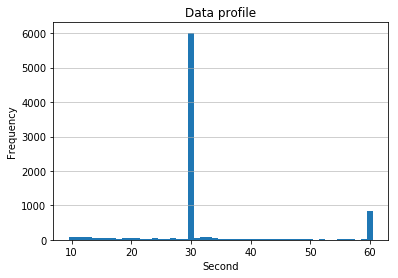

In [24]:
import matplotlib.pyplot as plt

time = [i for i in np.arange(9.5, 60.6, 1.0)]
# plt.figure(figsize=(15, 10))
plt.hist(count, bins=time)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Second')
plt.ylabel('Frequency')
plt.title('Data profile')
plt.show()

## Data profile

In [2]:
import numpy as np
from keras.utils import np_utils

trainD = np.load("/home/hsiehch/30s/train_data.npy")
trainL = np.load("/home/hsiehch/30s/train_label.npy")
validationD = np.load("/home/hsiehch/30s/validation_data.npy")
validationL = np.load("/home/hsiehch/30s/validation_label.npy")
testD = np.load("/home/hsiehch/30s/test_data.npy")
testL = np.load("/home/hsiehch/30s/test_label.npy")

trainD = np.append(trainD, validationD, axis=0)
trainL = np.append(trainL, validationL, axis=0)
trainD = np.append(trainD, testD, axis=0)
trainL = np.append(trainL, testL, axis=0)

trainData = trainD.reshape((trainD.shape[0], trainD.shape[1], 1))
trainLabel = np_utils.to_categorical(trainL, 4)
print('Train Data:', trainData.shape)
print('Train Label: ', trainLabel.shape)

Using TensorFlow backend.


Train Data: (10151, 9000, 1)
Train Label:  (10151, 4)


In [3]:
trainLabel

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]], dtype=float32)

{'A':0, '~':1, 'N':2, 'O':3}

In [4]:
sum(trainLabel)

array([ 903.,  299., 5959., 2990.], dtype=float32)